In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [286]:
data = pd.read_csv("data.csv", header=None)

In [287]:
data.head()

,0,1
0,4.806335,3.737175
1,-3.002545,1.925469
2,-0.535881,4.977610
3,-5.578146,3.233694
4,2.387877,3.268005


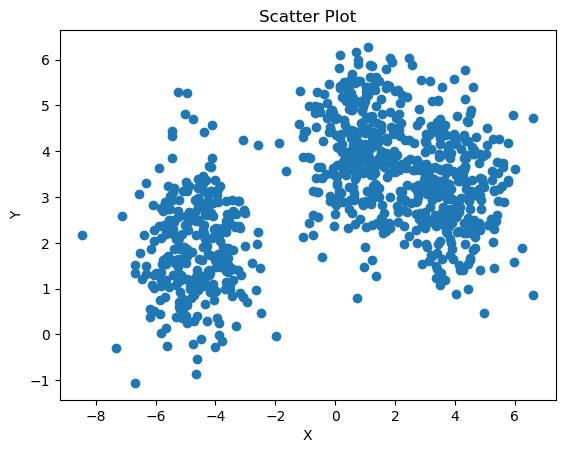

In [288]:
plt.scatter(data[0], data[1])
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

**Using K-Means Clustering**

In [289]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=40).fit(data)

In [290]:
labels = kmeans.labels_
inertia = kmeans.inertia_
print(inertia)

1655.657785902518


[[ 3.88649463  3.16069967]
 [-4.65092139  1.93352571]
 [ 0.80398691  4.05429151]]


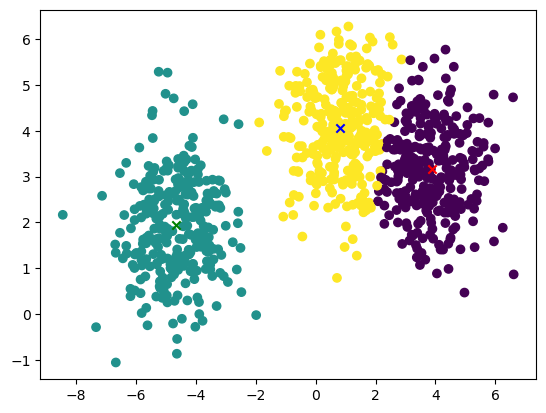

In [291]:
print(kmeans.cluster_centers_)
plt.scatter(data[0], data[1], c = labels, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker = 'x', color = 'r')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], marker = 'x', color = 'g')
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], marker = 'x', color = 'b')
plt.show()

Finding the Silhoutte Score for the Clusters
*The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.*

In [292]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(data, labels, random_state=42)
print('\n\t\tThe Silhouette Score for n = 3 is: ', sil)


		The Silhouette Score for n = 3 is:  0.5616266113097212


Finding the Davies Bouldin Score for the Clusters
*The minimum score is zero, with lower values indicating better clustering.*


In [293]:
from sklearn.metrics import davies_bouldin_score
dav = davies_bouldin_score(data, labels)
print("\n\t\tThe Davies Bouldin Score using K Means Clustering(n = 3) is: ", dav)


		The Davies Bouldin Score using K Means Clustering(n = 3) is:  0.6421354213040286


In [294]:
print("\n\t\t\tThe Intertia for BisectingKMeans is", inertia)
print("\n\t\t\tThe Silhoutte Score for BisectingKmeans with random init is", sil)


			The Intertia for BisectingKMeans is 1655.657785902518

			The Silhoutte Score for BisectingKmeans with random init is 0.5616266113097212


**Using Bisecting K-Means Clustering**

In [295]:
from sklearn.cluster import BisectingKMeans
bkm = BisectingKMeans(n_clusters=3, init='random', random_state=42)
bkm.fit(data)

BisectingKMeans(n_clusters=3, random_state=42)

In [296]:
labels = bkm.labels_
inertia = bkm.inertia_
print(inertia)

1671.7883824360774


[[ 0.84308818  4.05383638]
 [ 3.90348801  3.15981669]
 [-4.61952314  1.94717463]]


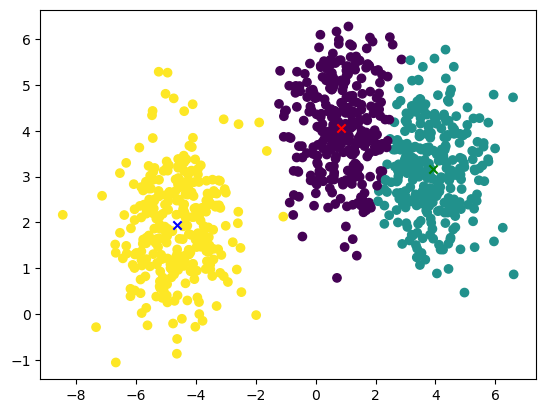

In [297]:
print(bkm.cluster_centers_)
plt.scatter(data[0], data[1], c = labels, cmap = 'viridis')
plt.scatter(bkm.cluster_centers_[0][0], bkm.cluster_centers_[0][1], marker = 'x', color = 'r')
plt.scatter(bkm.cluster_centers_[1][0], bkm.cluster_centers_[1][1], marker = 'x', color = 'g')
plt.scatter(bkm.cluster_centers_[2][0], bkm.cluster_centers_[2][1], marker = 'x', color = 'b')
plt.show()

Finding the Silhoutte Score for the Clusters


In [298]:
sil = silhouette_score(data, labels, random_state=42)
print('\n\t\tThe Silhouette Score for n = 3 is: ', sil)


		The Silhouette Score for n = 3 is:  0.5595853839177922


In [299]:
print("\n\t\t\tThe Intertia for BisectingKMeans is", inertia)
print("\n\t\t\tThe Silhoutte Score for BisectingKmeans with random init is", sil)


			The Intertia for BisectingKMeans is 1671.7883824360774

			The Silhoutte Score for BisectingKmeans with random init is 0.5595853839177922


**Using Bisecting KMeans Clustering with KMeans++**

In [300]:
bkmp = BisectingKMeans(n_clusters=3, init="k-means++", random_state=42)
bkmp.fit(data)

BisectingKMeans(init='k-means++', n_clusters=3, random_state=42)

Find the Inertia

In [301]:
inertia = bkmp.inertia_
labels = bkmp.labels_
print(inertia)

1671.8123463111494


[[ 0.84743235  4.04914317]
 [ 3.9097534   3.16148242]
 [-4.61952314  1.94717463]]


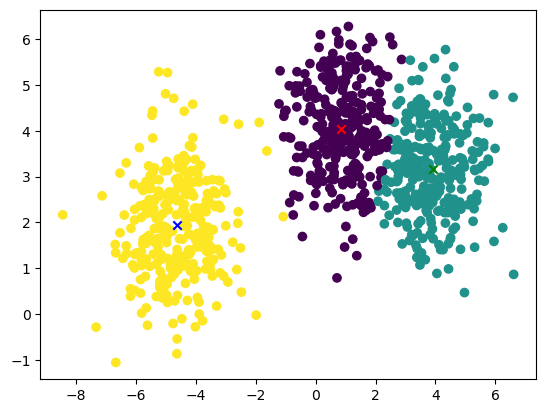

In [302]:
print(bkmp.cluster_centers_)
plt.scatter(data[0], data[1], c = labels, cmap = 'viridis')
plt.scatter(bkmp.cluster_centers_[0][0], bkmp.cluster_centers_[0][1], marker = 'x', color = 'r')
plt.scatter(bkmp.cluster_centers_[1][0], bkmp.cluster_centers_[1][1], marker = 'x', color = 'g')
plt.scatter(bkmp.cluster_centers_[2][0], bkmp.cluster_centers_[2][1], marker = 'x', color = 'b')
plt.show()

Finding the Silhoutte Score

In [303]:
sil = silhouette_score(data, labels)

In [304]:
print("\n\t\t\tThe Intertia for BisectingKMeans is", inertia)
print("\n\t\t\tThe Silhoutte Score for BisectingKmeans with random init is", sil)


			The Intertia for BisectingKMeans is 1671.8123463111494

			The Silhoutte Score for BisectingKmeans with random init is 0.5595853839177922


**Using DBSCAN**

In [305]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.7, min_samples=5)
db.fit(data)

DBSCAN(eps=0.7)

In [306]:
labels = db.labels_
print(labels)

[ 0  1  0  1  0  1  1  0  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0
 -1  0  0  1  0  1  1  1  0  1  0  0  1  0  1  1  0  0  1  0  1  1  1  1
  0  1  1  1  1  0  0  0  0  1  1  0  0  0  1  1  0  0  1  0  0  0  0  0
  0  0  1  0  0  0  1  0  0  0  1  1  1  1  0  1  0  1  0  1  0  0  0  1
  0  0  0  0  1  0 -1  1  0  1  1  0  0  0  2  0  0  0  1  0  0  0  1  0
  0  0  0  1  1  0  0  1  0  0  1  0  0  0  1  1  1  0  0  0  0  0  1  0
  0  1 -1  0  1  0  1  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  1
  1  1  1  0  1  1  0  1  0  1  0  0  0  0  1  1  0  0  1  0  0  0  0  1
  0  0  0  1  0  1  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  1
  0  1  1  0  0  0  0  1  1  1  0  0  1  0  0  1  0  0  1  0  1  0  0  0
  1  0  0  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0  1  0  1  0  0  0
 -1  0  1  1  1  1  1  1  0  0  0  1  1  0  0  0  0 -1  1  0  0  0  0  0
  0  0  1  0  1  0  0  0  0  1  0  0  0  0  0  1  1  0  0  0  1  0  0  0
  0  0  0  0  0  0  1 -1  0  0  0  1  1  1  1  0  0

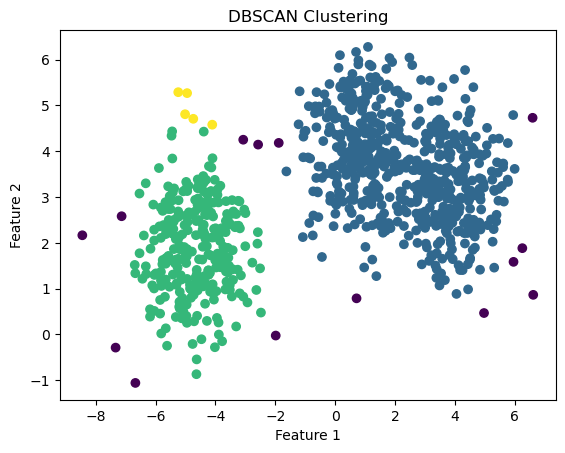

In [307]:
plt.scatter(data[0], data[1], c=labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()